In [34]:
import pandas as pd
import sys
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
file = "IRTAD_CASUAL_BY_AGE_18042023103442033.csv"

In [35]:
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

In [39]:
## Alternatively, can clip to more standard European extent 
## with Central/Eastern Russia excluded
bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

e:\Programming\Burgi\InfoVis-Verkeersongevallen\.conda\lib\site-packages\geopandas\geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


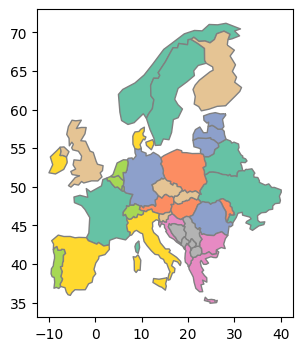

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.overlay(bbox_gdf, how="intersection")
world = world[world["continent"] == "Europe"][~world["name"].isin(["Russia", "Svalbard", "Iceland", "French Guiana", "Suriname"])]
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

In [43]:
def plot_map(col, data, free_legend=False, lower=0.0, higher=1.0):
    #ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

    merge_df = pd.merge(left=world, right=data, how="left", left_on="name", right_on="Country")

    vmin = lower#data[col].min()
    vmax = higher#data[col].max()
    cmap = "viridis"

    fig, ax = plt.subplots(1, figsize=(20, 8))
    ax.axis('off')
    if not free_legend:
        merge_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=free_legend, vmin=lower, vmax=higher)
    else:
        merge_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=free_legend)
    world.boundary.plot(ax=ax, linewidth=0.4, edgecolor=u'gray')

    ax.set_title(col, fontdict={'fontsize': '25', 'fontweight': '3'})

    if not free_legend:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
        # Empty array for the data range
        sm._A = []
        # Add the colorbar to the figure
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

    plt.plot()

In [5]:
data = pd.read_csv(file)
data

,COUNTRY,Country,INJURY_TYPE,Injury type,AGE_GROUP,Age group,TRAFFIC_PARTICIPATION,Road user,MEASURE,Measure,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,KIL,Killed,TOT,Total,TOT,Total,NUMBER,Number,...,1990,PER,Persons,0,Units,NaN,NaN,2331.0,NaN,NaN
1,AUS,Australia,KIL,Killed,TOT,Total,TOT,Total,NUMBER,Number,...,1991,PER,Persons,0,Units,NaN,NaN,2113.0,NaN,NaN
2,AUS,Australia,KIL,Killed,TOT,Total,TOT,Total,NUMBER,Number,...,1992,PER,Persons,0,Units,NaN,NaN,1974.0,NaN,NaN
3,AUS,Australia,KIL,Killed,TOT,Total,TOT,Total,NUMBER,Number,...,1993,PER,Persons,0,Units,NaN,NaN,1953.0,NaN,NaN
4,AUS,Australia,KIL,Killed,TOT,Total,TOT,Total,NUMBER,Number,...,1994,PER,Persons,0,Units,NaN,NaN,1928.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204653,LUX,Luxembourg,KIL,Killed,65MORE,65 years and more,PEDELECS,Of which: pedelecs,RATE-POP-100T,Rate per hundred thousand population,...,2021,100000HAB,Per 100 000 inhabitants,0,Units,NaN,NaN,0.0,NaN,NaN
204654,LUX,Luxembourg,KIL,Killed,65MORE,65 years and more,MICRO-VEHICLES,Motorised micro-vehicles excluding bikes and m...,RATE-POP-100T,Rate per hundred thousand population,...,2021,100000HAB,Per 100 000 inhabitants,0,Units,NaN,NaN,0.0,NaN,NaN
204655,LUX,Luxembourg,KIL,Killed,UNKNOWN,Unknown age,PEDELECS,Of which: pedelecs,NUMBER,Number,...,2021,PER,Persons,0,Units,NaN,NaN,0.0,NaN,NaN
204656,LUX,Luxembourg,KIL,Killed,UNKNOWN,Unknown age,MICRO-VEHICLES,Motorised micro-vehicles excluding bikes and m...,NUMBER,Number,...,2021,PER,Persons,0,Units,NaN,NaN,0.0,NaN,NaN


In [7]:
for col in data:
    print(col, data[col].unique())

COUNTRY ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT'
 'SVN' 'ESP' 'SWE' 'CHE' 'GBR' 'GB-IRTAD' 'GBR-NIR' 'USA' 'ARG' 'CHL'
 'SRB' 'COL']
Country ['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Korea' 'Lithuania' 'Luxembourg' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom' 'Great Britain ' 'Northern Ireland'
 'United States' 'Argentina' 'Chile' 'Serbia' 'Colombia']
INJURY_TYPE ['KIL']
Injury type ['Killed']
AGE_GROUP ['TOT' '0-14Y' '0-5Y' '6-9Y' '10-14Y' '15-24Y' '15-17Y' '18-20Y' '21-24Y'
 '25-64Y' '65MORE' 'UNKNOWN']
Age group ['Total' '0-14 years' '0-5 years' '6-9 years' '10-14 years' '15-24 years'
 '15-17 years' '18-20 years' '21-24 years' '25-64 years'
 '65 years and more' 'Unknown age']
TRAFFIC_PAR

In [45]:
data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"]

C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\2148740426.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"]
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\2148740426.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"]


,COUNTRY,Country,INJURY_TYPE,Injury type,AGE_GROUP,Age group,TRAFFIC_PARTICIPATION,Road user,MEASURE,Measure,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
158,AUS,Australia,KIL,Killed,TOT,Total,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,42.0,p,Provisional
606,AUT,Austria,KIL,Killed,TOT,Total,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,40.0,NaN,NaN
1118,BEL,Belgium,KIL,Killed,TOT,Total,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,84.0,NaN,NaN
1628,CAN,Canada,KIL,Killed,TOT,Total,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,51.0,e,Estimate
2138,CZE,Czech Republic,KIL,Killed,TOT,Total,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,51.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202237,COL,Colombia,KIL,Killed,18-20Y,18-20 years,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,33.0,NaN,NaN
202419,COL,Colombia,KIL,Killed,21-24Y,21-24 years,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,25.0,NaN,NaN
202601,COL,Colombia,KIL,Killed,25-64Y,25-64 years,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,241.0,NaN,NaN
202783,COL,Colombia,KIL,Killed,65MORE,65 years and more,CYCLISTS,Cyclists,NUMBER,Number,...,2020,PER,Persons,0,Units,NaN,NaN,92.0,NaN,NaN


In [58]:
pd.merge(left=world, right=data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"][data["Age group"] == "Total"], how="left", left_on="name", right_on="Country")
#pd.merge(left=world, right=data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"], how="left", left_on="name", right_on="Country").iloc[1]

C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\111992459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.merge(left=world, right=data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"][data["Age group"] == "Total"], how="left", left_on="name", right_on="Country")
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\111992459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.merge(left=world, right=data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"][data["Age group"] == "Total"], how="left", left_on="name", right_on="Country")
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\111992459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.merge(left=world, right=data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2020][data["Measure"] == "Number"][data["Age group"] == "Tota

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,COUNTRY,Country,INJURY_TYPE,Injury type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",NOR,Norway,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,5.0,NaN,NaN
1,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((9.39000 43.00998, 9.56002 42.1...",FRA,France,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,178.0,NaN,NaN
2,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.46827 59.43239, 12.30037 60.11793...",SWE,Sweden,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,18.0,NaN,NaN
3,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((29.22951 55.91834, 29.37157 55.67009...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.41206 52.28869, 32.71576 52.23847...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.52754 53.47012, 23.80493 53.08973...",POL,Poland,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,249.0,NaN,NaN
6,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.90375 47.71487, 16.34058 47.71290...",AUT,Austria,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,40.0,NaN,NaN
7,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.64082 48.15024, 22.71053 47.88219...",HUN,Hungary,KIL,Killed,...,2020.0,PER,Persons,0.0,Units,NaN,NaN,39.0,NaN,NaN
8,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.85782 48.36821, 27.52254 48.46712...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19356544.0,Europe,Romania,ROU,250077,"POLYGON ((28.67978 45.30403, 29.14972 45.46493...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\1136068798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\1136068798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\1136068798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] ==

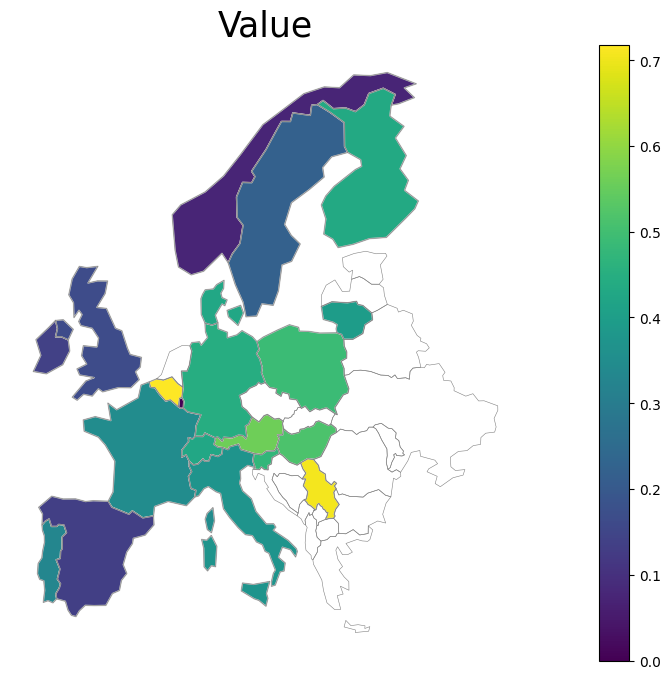

In [62]:
plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "CYCLISTS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\827131856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "PEDELECS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\827131856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "PEDELECS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_26100\827131856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "PEDELECS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "T

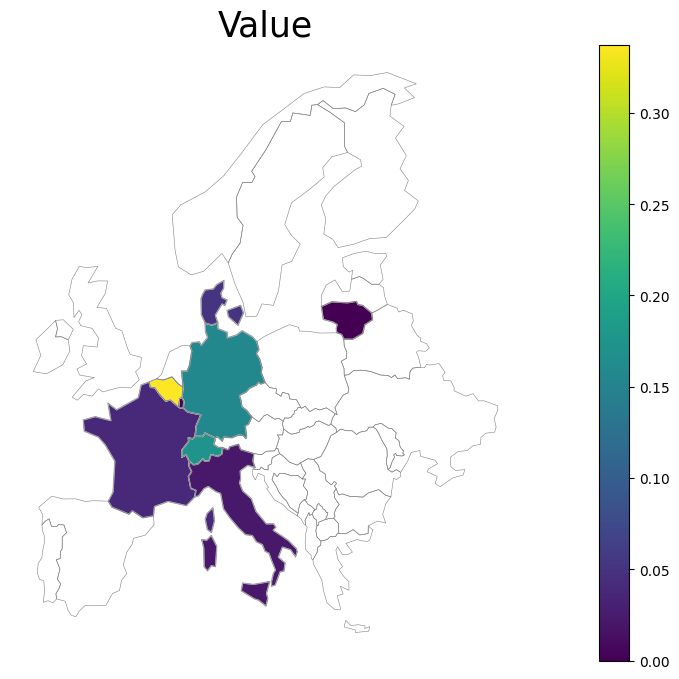

In [63]:
plot_map("Value", data[data["TRAFFIC_PARTICIPATION"] == "PEDELECS"][data["Year"] == 2021][data["Measure"] == "Rate per hundred thousand population"][data["Age group"] == "Total"], free_legend=True)